In [8]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=False)

test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

train_images, train_labels = next(iter(train_loader))
test_images, test_labels = next(iter(test_loader))

print('Train images:', train_images.shape)
print('Train labels', train_labels.shape)
print('Test images:', test_images.shape)
print('Test labels:', test_labels.shape)

Train images: torch.Size([60000, 1, 28, 28])
Train labels torch.Size([60000])
Test images: torch.Size([10000, 1, 28, 28])
Test labels: torch.Size([10000])


In [11]:
X = train_images.view(train_images.size(0), -1).numpy()
y = train_labels.numpy()
print(X.shape)

(60000, 784)


/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


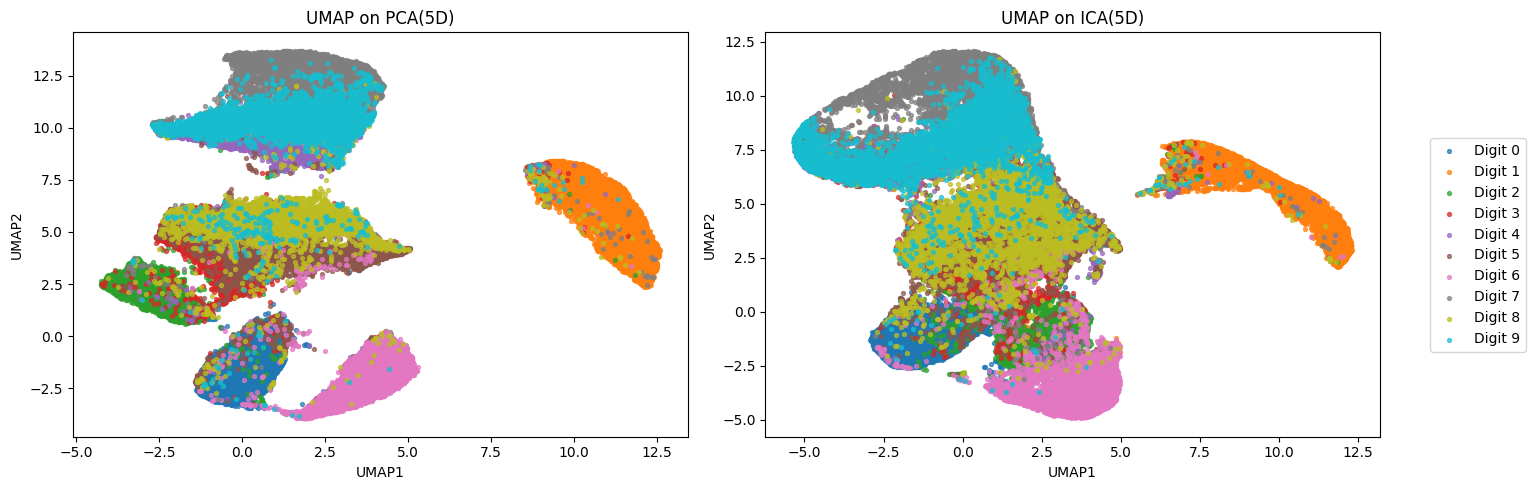

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import umap

random_state = 42
n_lin = 10    # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Linear reducers (to 5D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)

ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)


# UMAP from 5D → 2D
# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=30, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)

# ----- Plot with legend showing digit-color mapping -----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: UMAP on PCA
for digit in range(10):
    mask = y == digit
    ax1.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=f'Digit {digit}', alpha=0.7)
ax1.set_title("UMAP on PCA(5D)")
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")

# Plot 2: UMAP on ICA
for digit in range(10):
    mask = y == digit
    ax2.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=f'Digit {digit}', alpha=0.7)
ax2.set_title("UMAP on ICA(5D)")
ax2.set_xlabel("UMAP1")
ax2.set_ylabel("UMAP2")

# Add a shared legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), ncol=1)

plt.tight_layout()
plt.show()

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


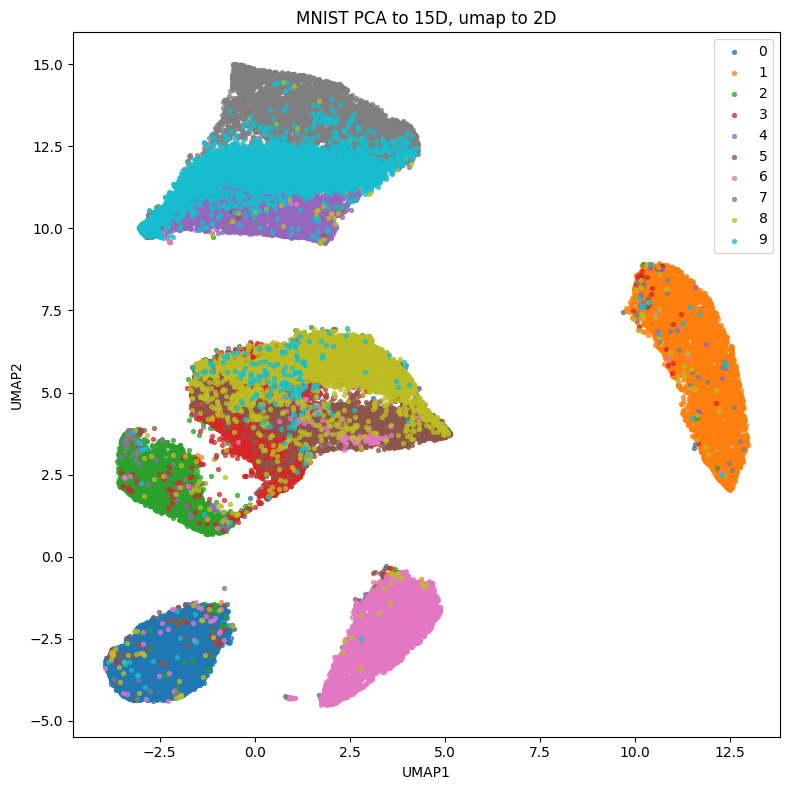

/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/sklearn/decomposition/_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/ignatius/Studies/repos/latent-space-probing/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


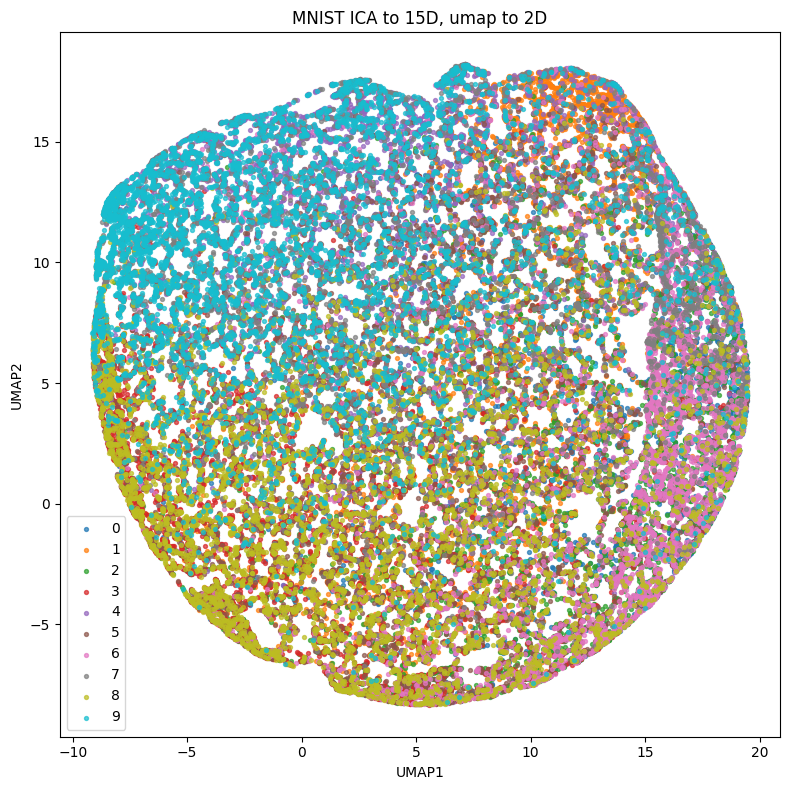

In [18]:
random_state = 42
n_lin = 15    # target dims for PCA/ICA
n_out = 2      # UMAP output dims: 2D plot

# Tips:
# - n_neighbors controls local vs global structure (higher ~ more global).
# - min_dist controls cluster tightness (lower → tighter clusters).
# - metric='cosine' often works well for embeddings/text; 'euclidean' is fine for many numeric sets.
umap_cfg = dict(n_neighbors=30, min_dist=0.05, n_components=n_out, metric='euclidean', random_state=random_state)

# Linear reducers (to 5D)
pca = make_pipeline(StandardScaler(with_mean=True), PCA(n_components=n_lin, random_state=random_state))
X_pca = pca.fit_transform(X)
umap_pca = umap.UMAP(**umap_cfg).fit_transform(X_pca)


plt.figure(figsize=(8, 8))
for digit in range(10):
    mask = y == digit
    plt.scatter(umap_pca[mask, 0], umap_pca[mask, 1], s=8, label=str(digit), alpha=0.7)

plt.title(f"MNIST PCA to {n_lin}D, umap to 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()



ica = make_pipeline(StandardScaler(with_mean=True), FastICA(n_components=n_lin, random_state=random_state, max_iter=1000))
X_ica = ica.fit_transform(X)
umap_ica = umap.UMAP(**umap_cfg).fit_transform(X_ica)


plt.figure(figsize=(8, 8))
for digit in range(10):
    mask = y == digit
    plt.scatter(umap_ica[mask, 0], umap_ica[mask, 1], s=8, label=str(digit), alpha=0.7)

plt.title(f"MNIST ICA to {n_lin}D, umap to 2D")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.legend()
plt.tight_layout()
plt.show()